In [1]:
# env
!which python

/home/david/mambaforge/envs/bmcp/bin/python


# Chapter 1 - Bayesian Inference Exercises

In [2]:
import os
import math
import warnings
from pathlib import Path

import pandas as pd
import numpy as np
import scipy.stats as stats
from plotnine import *
import pymc3 as pm
import matplotlib.pyplot as plt
import arviz as az

%matplotlib inline
%load_ext dotenv
%dotenv
# %load_ext autoreload
# %autoreload 2
theme_set(theme_bw())
pd.set_option('display.max_columns', 500)

SEED = 919

PROJECT_DIR = Path(os.environ['PROJECT_DIR'])
DATA_DIR = PROJECT_DIR / 'data'
DATA_DIR

PosixPath('/media/david/T7/code/bmcp/bmcp-notes/data')

In [3]:
# 1.5 Exercises

## 1E1
+ CAD Model
+ CFD model
+ The Standard Model

## 1E2
1. The probability of a parameter given the observed data: I think this means probability of a parameter (distribution) given a particular dataset.
    + $p(\theta| Y)$ - prob. dist. of param. given observed data - posterior distribution of param
2. The distribution of parameters before seeing any data
    + $p(\theta)$ - dist. of param. but this mean prob. dist. not dist. is this always true?
3. The plausibility of the observed data given a parameter value - assume particular parameter value is x
    + $p(Y | \theta=x)$ - plausibility of observed data given a parameter value x - likelihood ie before normalizing
    + Should be $p(Y | \theta)$ - Don't get this I thought theta was a distribution not a particular value
4. The probability of an unseen observation given the observed data
    + $p(\hat{Y} \; | Y)$
    + Should be other side of equation - integral
5. The probability of an unseen observation before seeing any data
    + $p(Y^*)$ - prior predictive prob. dit. of the data
    + should be other side of eqn. - integral

## 1E3
Probability of being sunny given it is july 9 1816

+ $p(sunny | date=july 9 1816)$
+ closest # 3

+ ?? Also correct
+ $p(sunny, jul 9 1816) / p(jul 9 1816)$ == $p(sunny | date) / p(date)$


## 1E4
?? Cannot follow this.
+ probability of choosing a human at random ?? - instead of what? a dog or a cat?
+ maybe choosing a particular human at random
+ Choose a particular human at random $p(particular human) = 1 / 8 billion$
+ Probability of pope being human = 1, unless between popes in which case prob. of pope being human = 0, because there is no pope unless we accept a dead pope is a human and still the pope.
+ assume talking now - mar 2 2023 - in which case there is a pope. Probability pope is human is 1
+ and probability of choosing a human at random from all humans is also 1, because we are choosing a human from a pool of only humans ?
+ $p(particlar person is the pope) = 1/ 8 billion$
+ p(select particular person at random and he is pope) = 1 / 8 billion$ - Is this right?
+ In Futurama the pope is a reptile.
+ This does not change my calculations. Futurama is a cartoon - It is fiction. I just cannot see how a reptile will ever be the pope instead of a human.

I cannot make sense of this question

## 1E5

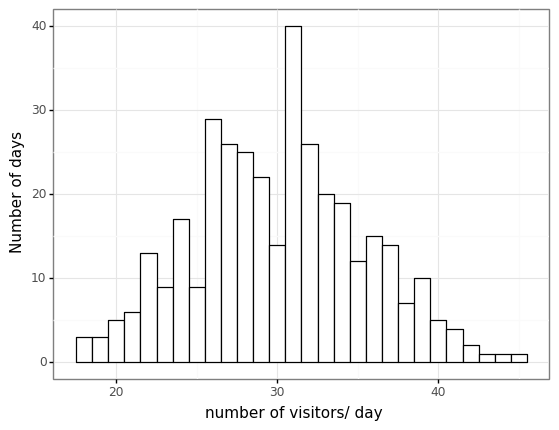

In [4]:
# 1. Number of people visiting local cafe assuming Poisson dist.
tot_days = 358
dist = pd.DataFrame({'day': range(0, tot_days), 'num_people': stats.poisson.rvs(30, size=tot_days)})
p = (ggplot(dist, aes('num_people')) +
     geom_histogram(color='black', fill='white', binwidth=1) +
     ylab("Number of days") +
     xlab("number of visitors/ day")
    )
p.draw();

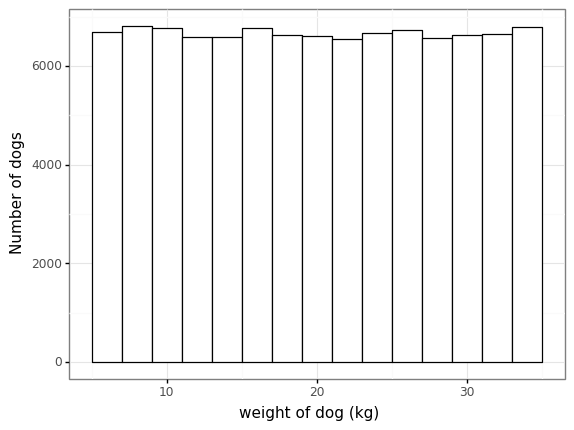

In [5]:
# 2. weight of adult dogs (kg) assuming Uniform dist
tot_dogs = 100000
dist = pd.DataFrame({'day': range(0, tot_dogs), 'num_dogs': stats.uniform.rvs(5, 30, size=tot_dogs)})
p = (ggplot(dist, aes('num_dogs')) +
     geom_histogram(color='black', fill='white', binwidth=2) +
     ylab("Number of dogs") +
     xlab("weight of dog (kg)")
    )
p.draw();

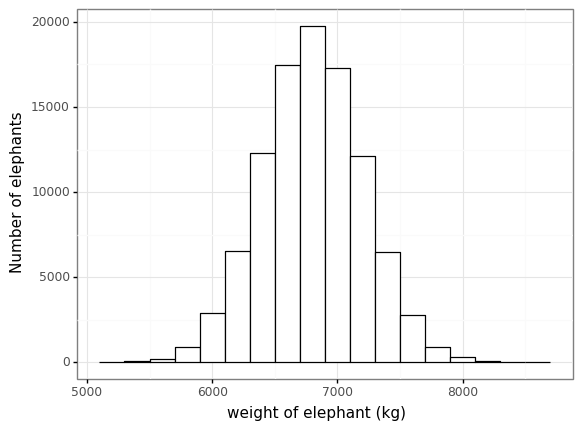

In [6]:
# 3. weight of adult elephants (kg) assuming normal dist
tot_eles = 100000
dist = pd.DataFrame({'day': range(0, tot_eles), 'num_elephants': stats.norm.rvs(6800, 400, size=tot_eles)})
p = (ggplot(dist, aes('num_elephants')) +
     geom_histogram(color='black', fill='white', binwidth=200) +
     ylab("Number of elephants") +
     xlab("weight of elephant (kg)")
    )
p.draw();

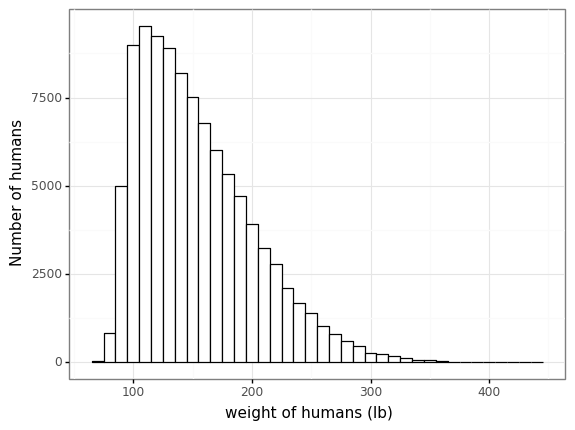

In [7]:
# 4. weight of adult humans (lb) assuming skew normal dist
tot_hum = 100000
dist = pd.DataFrame({'day': range(0, tot_hum), 'num_humans': stats.skewnorm.rvs(12, 90, 80, size=tot_hum)})
p = (ggplot(dist, aes('num_humans')) +
     geom_histogram(color='black', fill='white', binwidth=10) +
     ylab("Number of humans") +
     xlab("weight of humans (lb)")
    )
p.draw();

## 1E6

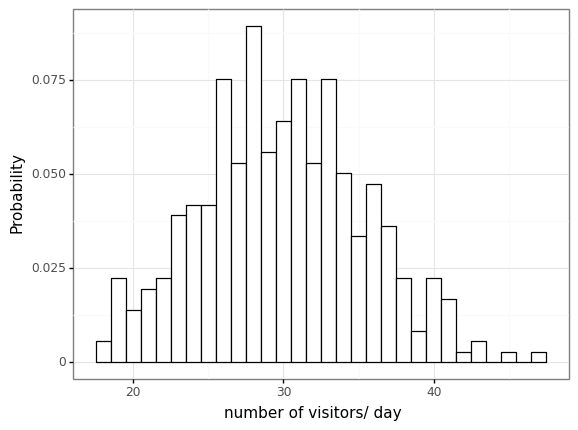

In [8]:
# 1. Number of people visiting local cafe assuming Poisson dist.
tot_days = 358
dist = pd.DataFrame({'day': range(0, tot_days), 'num_people': stats.poisson.rvs(30, size=tot_days)})
p = (ggplot(dist, aes(x='num_people', y=after_stat('density'))) +
     geom_histogram(binwidth=1, color='black', fill='white') +
     ylab("Probability") +
     xlab("number of visitors/ day")
    )
p.draw();

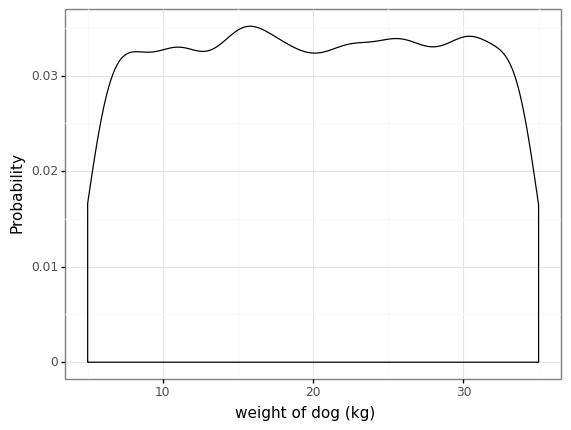

In [9]:
# 2. weight of adult dogs (kg) assuming Uniform dist
tot_dogs = 10000
dist = pd.DataFrame({'day': range(0, tot_dogs), 'num_dogs': stats.uniform.rvs(5, 30, size=tot_dogs)})
p = (ggplot(dist, aes('num_dogs')) +
     geom_density() +
     ylab("Probability") +
     xlab("weight of dog (kg)")
    )
p.draw();

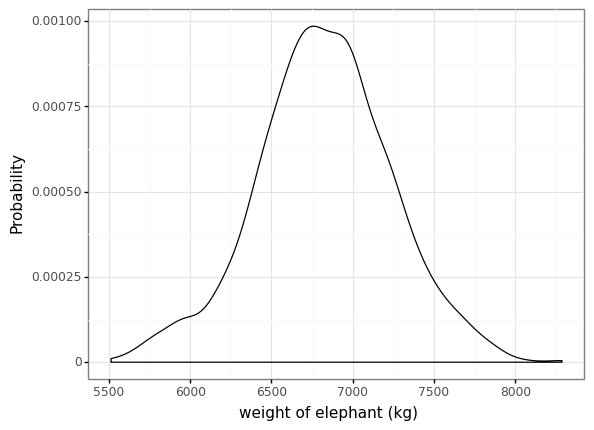

In [10]:
# 3. weight of adult elephants (kg) assuming normal dist
tot_eles = 1000
dist = pd.DataFrame({'day': range(0, tot_eles), 'num_elephants': stats.norm.rvs(6800, 400, size=tot_eles)})
p = (ggplot(dist, aes('num_elephants')) +
     geom_density() +
     ylab("Probability") +
     xlab("weight of elephant (kg)")
    )
p.draw();

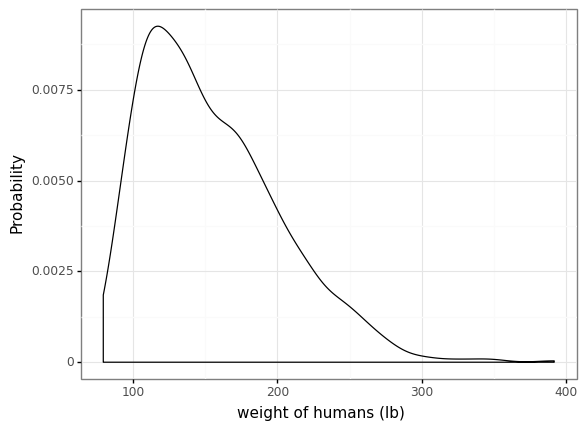

In [11]:
# 4. weight of adult humans (lb) assuming skew normal dist
tot_hum = 1000
dist = pd.DataFrame({'day': range(0, tot_hum), 'num_humans': stats.skewnorm.rvs(12, 90, 80, size=tot_hum)})
p = (ggplot(dist, aes('num_humans')) +
     geom_density() +
     ylab("Probability") +
     xlab("weight of humans (lb)")
    )
p.draw();

## 1E7
+ Compare priors beta(0.5, 0.5), Beta(1,1), Beta(1,4)
+ How do the priors differ in terms of shape?

In [12]:
x = np.linspace(0, 1.0, 101)
y1 = stats.beta.pdf(x, 0.5, 0.5)
y2 = stats.beta.pdf(x, 1.0, 1.0)
y3 = stats.beta.pdf(x, 1.0, 4.0)
df = pd.DataFrame({'x': np.hstack([x, x, x]),
                   'y': np.hstack([y1, y2, y3]),
                   'beta_params': ['(0.5, 0.5)']*len(x) + ['(1, 1)']*len(x) + ['(1, 4)']*len(x)})

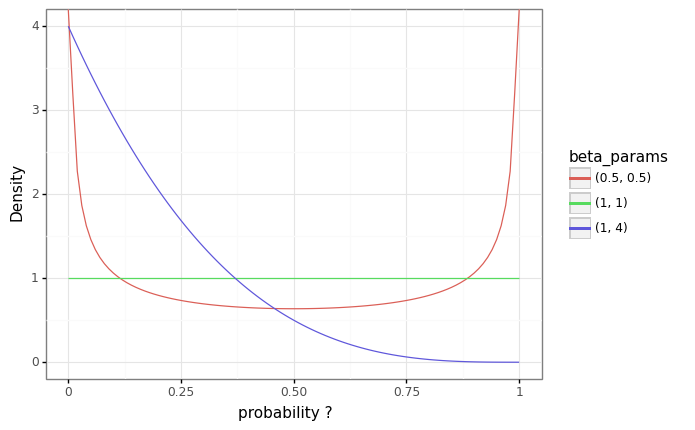

In [13]:
p = (ggplot(df, aes(x='x', y='y', colour='beta_params')) +
     geom_line() +
     ylab("Density") +
     xlab("probability ?")
    )
p.draw();

## 1E8
+ Rerun Code Block binomial_update but using two Beta-priors of your choice

/tmp/ipykernel_2853074/773359222.py:27: RuntimeWarning: invalid value encountered in true_divide
/tmp/ipykernel_2853074/773359222.py:27: RuntimeWarning: invalid value encountered in true_divide
/tmp/ipykernel_2853074/773359222.py:27: RuntimeWarning: invalid value encountered in true_divide


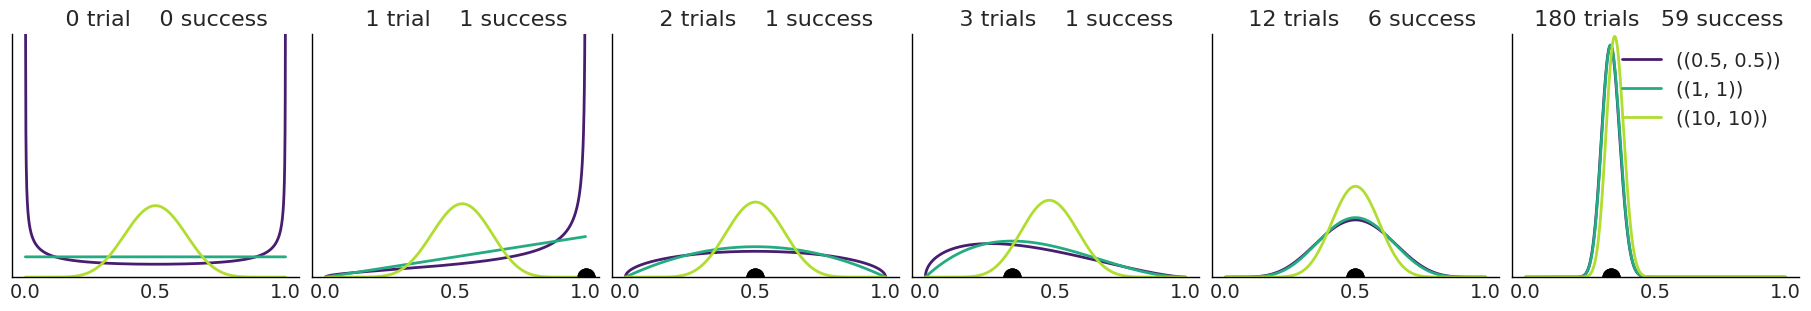

In [14]:
az.style.use("arviz-grayscale")
# plt.rcParams['figure.dpi'] = 200
np.random.seed(521)
viridish = [(0.2823529411764706, 0.11372549019607843, 0.43529411764705883, 1.0),
            (0.1450980392156863, 0.6705882352941176, 0.5098039215686274, 1.0),
            (0.6901960784313725, 0.8666666666666667, 0.1843137254901961, 1.0)]

_, axes = plt.subplots(1,6, sharey=True, sharex=True, figsize=(18, 3))
axes = np.ravel(axes)

n_trials = [0, 1, 2, 3, 12, 180]
success = [0, 1, 1, 1, 6, 59]
data = zip(n_trials, success)

beta_params = [(0.5, 0.5), (1, 1), (10, 10)]
# beta_params= [(0.5, 5), (10, 0.01), (100, 100)]
θ = np.linspace(0, 1, 1500)
for idx, (N, y) in enumerate(data):
    s_n = ("s" if (N > 1) else "")
    for jdx, (a_prior, b_prior) in enumerate(beta_params):
        # print(a_prior, b_prior)
        p_theta_given_y = stats.beta.pdf(θ, a_prior + y, b_prior + N - y)

        axes[idx].plot(θ, p_theta_given_y, lw=2, color=viridish[jdx], label=f'({a_prior, b_prior})')
        axes[idx].set_yticks([])
        axes[idx].set_ylim(0, 12)
        axes[idx].plot(np.divide(y, N), 0, color="k", marker="o", ms=12)
        axes[idx].set_title(f"{N:4d} trial{s_n} {y:4d} success")
plt.legend(loc="upper right")
plt.show();

+ To interpret this plot:
    + LH plot - the 3 lines are the 3 priors - no data used
    + Move to next plot - black dot hows the data as 1success / 1 trail = 1. Prior move
    + Next plots change data (proprtion shown as black dot) and priors move from initial plot to new shape and are now posteriors - because we have updated the priors based on the data
    + By plot 6 the shape of the priors has had almost no impact on the resulting posteriors

/tmp/ipykernel_2853074/3082018163.py:27: RuntimeWarning: invalid value encountered in true_divide
/tmp/ipykernel_2853074/3082018163.py:27: RuntimeWarning: invalid value encountered in true_divide
/tmp/ipykernel_2853074/3082018163.py:27: RuntimeWarning: invalid value encountered in true_divide


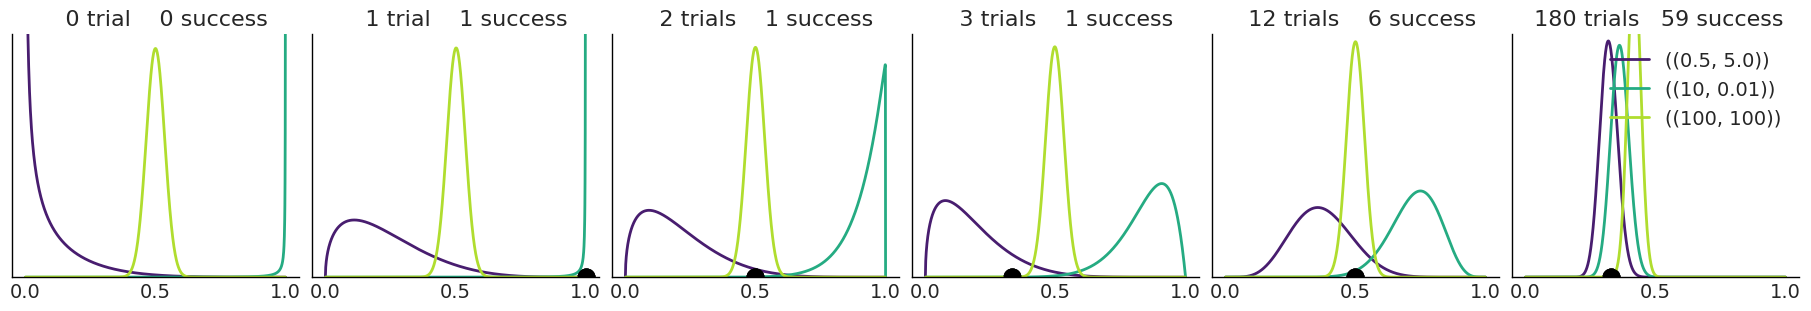

In [15]:
az.style.use("arviz-grayscale")
# plt.rcParams['figure.dpi'] = 200
np.random.seed(521)
viridish = [(0.2823529411764706, 0.11372549019607843, 0.43529411764705883, 1.0),
            (0.1450980392156863, 0.6705882352941176, 0.5098039215686274, 1.0),
            (0.6901960784313725, 0.8666666666666667, 0.1843137254901961, 1.0)]

_, axes = plt.subplots(1,6, sharey=True, sharex=True, figsize=(18, 3))
axes = np.ravel(axes)

n_trials = [0, 1, 2, 3, 12, 180]
success = [0, 1, 1, 1, 6, 59]
data = zip(n_trials, success)

# beta_params = [(0.5, 0.5), (1, 1), (10, 10)]
beta_params= [(0.5, 5.0), (10, 0.01), (100, 100)]
θ = np.linspace(0, 1, 1500)
for idx, (N, y) in enumerate(data):
    s_n = ("s" if (N > 1) else "")
    for jdx, (a_prior, b_prior) in enumerate(beta_params):
        # print(a_prior, b_prior)
        p_theta_given_y = stats.beta.pdf(θ, a_prior + y, b_prior + N - y)

        axes[idx].plot(θ, p_theta_given_y, lw=2, color=viridish[jdx], label=f'({a_prior, b_prior})')
        axes[idx].set_yticks([])
        axes[idx].set_ylim(0, 12)
        axes[idx].plot(np.divide(y, N), 0, color="k", marker="o", ms=12)
        axes[idx].set_title(f"{N:4d} trial{s_n} {y:4d} success")
plt.legend(loc="upper right")
plt.show();

+ Posteriors (based on different priors) converge to a consensus a lot more slowly
+ Not as much consensus as previously

/tmp/ipykernel_2853074/667194177.py:27: RuntimeWarning: invalid value encountered in true_divide
/tmp/ipykernel_2853074/667194177.py:27: RuntimeWarning: invalid value encountered in true_divide
/tmp/ipykernel_2853074/667194177.py:27: RuntimeWarning: invalid value encountered in true_divide


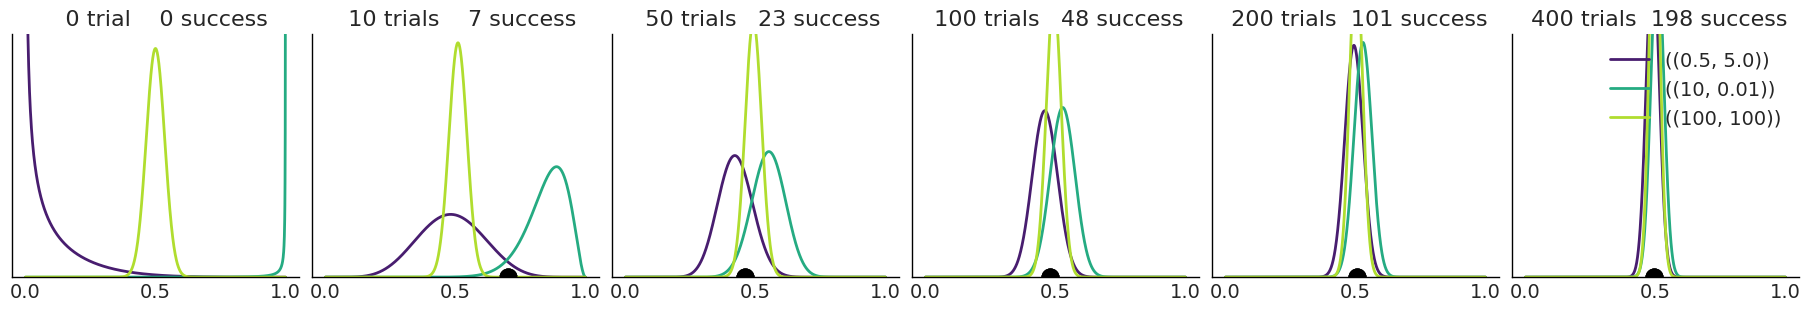

In [16]:
az.style.use("arviz-grayscale")
# plt.rcParams['figure.dpi'] = 200
np.random.seed(521)
viridish = [(0.2823529411764706, 0.11372549019607843, 0.43529411764705883, 1.0),
            (0.1450980392156863, 0.6705882352941176, 0.5098039215686274, 1.0),
            (0.6901960784313725, 0.8666666666666667, 0.1843137254901961, 1.0)]

_, axes = plt.subplots(1,6, sharey=True, sharex=True, figsize=(18, 3))
axes = np.ravel(axes)

n_trials = [0, 10, 50, 100, 200, 400]
success = [0, 7, 23, 48, 101, 198]
data = zip(n_trials, success)

# beta_params = [(0.5, 0.5), (1, 1), (10, 10)]
beta_params= [(0.5, 5.0), (10, 0.01), (100, 100)]
θ = np.linspace(0, 1, 1500)
for idx, (N, y) in enumerate(data):
    s_n = ("s" if (N > 1) else "")
    for jdx, (a_prior, b_prior) in enumerate(beta_params):
        # print(a_prior, b_prior)
        p_theta_given_y = stats.beta.pdf(θ, a_prior + y, b_prior + N - y)

        axes[idx].plot(θ, p_theta_given_y, lw=2, color=viridish[jdx], label=f'({a_prior, b_prior})')
        axes[idx].set_yticks([])
        axes[idx].set_ylim(0, 12)
        axes[idx].plot(np.divide(y, N), 0, color="k", marker="o", ms=12)
        axes[idx].set_title(f"{N:4d} trial{s_n} {y:4d} success")
plt.legend(loc="upper right")
plt.show();

+ Impact of more data on washing out the priors

## 1E9

Text(0, 0.5, '$p(t)$')

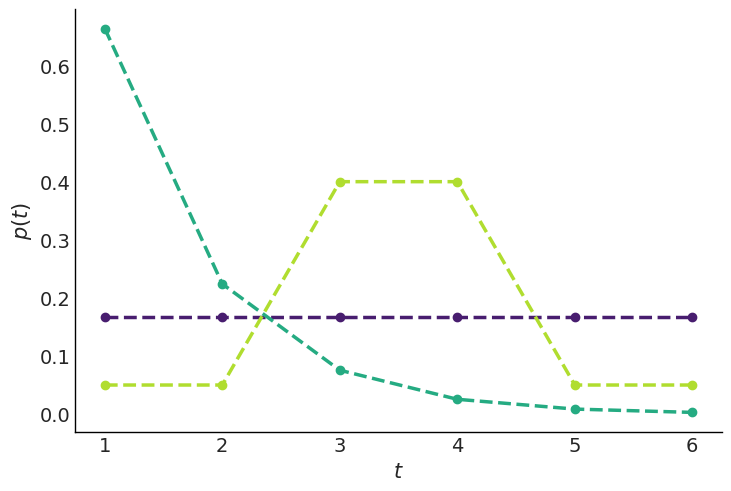

In [17]:
from scipy.optimize import minimize
from scipy.stats import entropy

cons = [[{"type": "eq", "fun": lambda x: np.sum(x) - 1}],
        [{"type": "eq", "fun": lambda x: np.sum(x) - 1},
         {"type": "eq", "fun": lambda x: 1.5 - np.sum(x * np.arange(1, 7))}],
        [{"type": "eq", "fun": lambda x: np.sum(x) - 1},
         {"type": "eq", "fun": lambda x: np.sum(x[[2, 3]]) - 0.8}]]

max_ent = []
for i, c in enumerate(cons):
    val = minimize(lambda x: -entropy(x), x0=[1/6]*6, bounds=[(0., 1.)] * 6,
                   constraints=c)['x']
    max_ent.append(entropy(val))
    plt.plot(np.arange(1, 7), val, 'o--', color=viridish[i], lw=2.5)
plt.xlabel("$t$")
plt.ylabel("$p(t)$")

### Docs example `minimize`

In [18]:
# docs example for minimize
# Next, consider a minimization problem with several constraints (namely Example 16.4 from [5]_). The objective function is:
fun = lambda x: (x[0] - 1)**2 + (x[1] - 2.5)**2

# There are three constraints defined as:
cons = ({'type': 'ineq', 'fun': lambda x:  x[0] - 2 * x[1] + 2},
        {'type': 'ineq', 'fun': lambda x: -x[0] - 2 * x[1] + 6},
        {'type': 'ineq', 'fun': lambda x: -x[0] + 2 * x[1] + 2})

# And variables must be positive, hence the following bounds:
bnds = ((0, None), (0, None))

# The optimization problem is solved using the SLSQP method as:
res = minimize(fun, (2, 0), method='SLSQP', bounds=bnds, constraints=cons)
res

     fun: 0.8000000011920985
     jac: array([ 0.80000002, -1.59999999])
 message: 'Optimization terminated successfully'
    nfev: 10
     nit: 3
    njev: 3
  status: 0
 success: True
       x: array([1.4, 1.7])

### Rewrite to single cases

In [19]:
# Minimization func
fun = lambda x: -entropy(x)

# number of independent variables [to be returned from the minimize func.?]
n_indvars = 10

# constraint equality sum(x) - 1 
constraints = [{'type': 'eq', 'fun': lambda x: np.sum(x) -1}] 

#  bounds : sequence or `Bounds`, optional
#  Bounds on variables for Nelder-Mead, L-BFGS-B, TNC, SLSQP, Powell, and
#  - Sequence of ``(min, max)`` pairs for each element in `x`
bounds = [(0.0, 1.0)] * n_indvars

# initial guess
# x0 : ndarray, shape (n,)
#        Initial guess. Array of real elements of size (n,),
#        where 'n' is the number of independent variables.
# Initial guess is a uniform distribution between 1 and n_indvars + 1
initial_guess = [1/n_indvars] * n_indvars

val_array = minimize(fun=fun, bounds=bounds, x0=initial_guess, constraints=constraints)
res_df1 = pd.DataFrame({'t': range(1, n_indvars+1), 'p(t)': val_array.x})
res_df1['situation'] = 'no constraint' 

In [20]:
# Minimization func
fun = lambda x: -entropy(x)

# number of independent variables [to be returned from the minimize func.?]
n_indvars = n_indvars

# constraint equality sum(x) - 1 
# 2nd constraint must be mean = 1.5, but cannot follow calculations
known_mean=8.0
constraints = [{'type': 'eq', 'fun': lambda x: np.sum(x) -1},
               {'type': 'eq', 'fun': lambda x: known_mean - np.sum(x* np.arange(1, n_indvars+1))}] 

#  bounds : sequence or `Bounds`, optional
#  Bounds on variables for Nelder-Mead, L-BFGS-B, TNC, SLSQP, Powell, and
#  - Sequence of ``(min, max)`` pairs for each element in `x`
bounds = [(0.0, 1.0)] * n_indvars
# initial guess
# x0 : ndarray, shape (n,)
#        Initial guess. Array of real elements of size (n,),
#        where 'n' is the number of independent variables.
# Initial guess is a uniform distribution between 1 and n_indvars + 1
initial_guess = [1/n_indvars] * n_indvars

val_array = minimize(fun=fun, bounds=bounds, x0=initial_guess, constraints=constraints)
print(val_array)
res_df2 = pd.DataFrame({'t': range(1, n_indvars+1), 'p(t)': val_array.x})
res_df2['situation'] = f'known mean: {known_mean}' 

     fun: -1.8884770460922304
     jac: array([-2.55920686e+00, -2.19367649e+00, -1.82871769e+00, -1.46284707e+00,
       -1.09720705e+00, -7.31417432e-01, -3.65797803e-01,  1.89244747e-06,
        3.65760103e-01,  7.31379688e-01])
 message: 'Optimization terminated successfully'
    nfev: 189
     nit: 16
    njev: 16
  status: 0
 success: True
       x: array([0.01170564, 0.01687109, 0.02430204, 0.03503792, 0.05050493,
       0.07281054, 0.10494961, 0.15130234, 0.21811846, 0.31439744])


In [21]:
# Minimization func
fun = lambda x: -entropy(x)

# number of independent variables [to be returned from the minimize func.?]
n_indvars = n_indvars

# constraint equality sum(x) - 1 
# 2nd constraint must be mean = 1.5, but cannot follow calculations
vals = [5,6]
proba = 0.5
constraints = [{"type": "eq", "fun": lambda x: np.sum(x) - 1},
               {"type": "eq", "fun": lambda x: np.sum(x[vals]) - proba}]

#  bounds : sequence or `Bounds`, optional
#  Bounds on variables for Nelder-Mead, L-BFGS-B, TNC, SLSQP, Powell, and
#  - Sequence of ``(min, max)`` pairs for each element in `x`
bounds = [(0.0, 1.0)] * n_indvars
# initial guess
# x0 : ndarray, shape (n,)
#        Initial guess. Array of real elements of size (n,),
#        where 'n' is the number of independent variables.
# Initial guess is a uniform distribution between 1 and n_indvars + 1
initial_guess = [1/n_indvars] * n_indvars

val_array = minimize(fun=fun, bounds=bounds, x0=initial_guess, constraints=constraints)
print(val_array)
res_df3 = pd.DataFrame({'t': range(1, n_indvars+1), 'p(t)': val_array.x})
res_df3['situation'] = f'vals {vals} appear with proba={proba}' 

     fun: -2.0794415416798357
     jac: array([-0.69314706, -0.69314706, -0.69314706, -0.69314706, -0.69314706,
        0.69314718,  0.69314718, -0.69314706, -0.69314706, -0.69314703])
 message: 'Optimization terminated successfully'
    nfev: 34
     nit: 3
    njev: 3
  status: 0
 success: True
       x: array([0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.25  , 0.25  , 0.0625,
       0.0625, 0.0625])


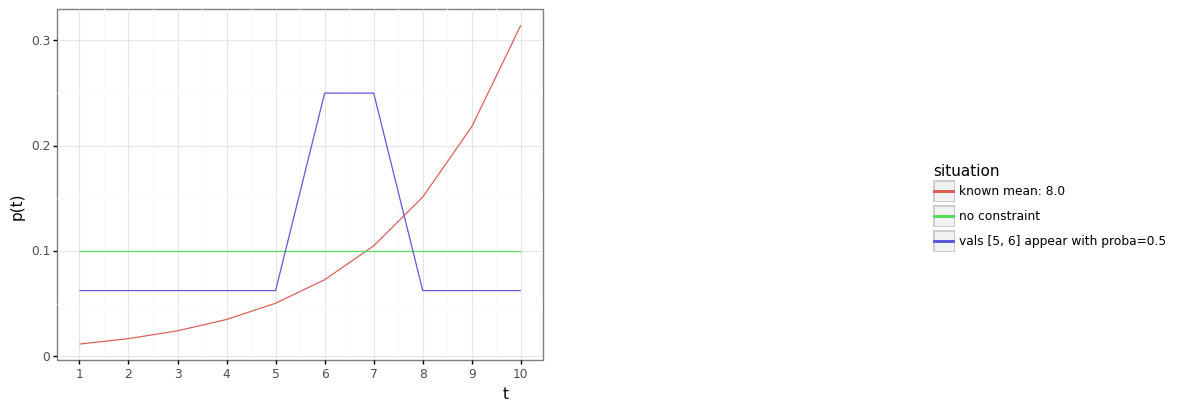

In [22]:
res_df = pd.concat([res_df1, res_df2, res_df3], axis=0).reset_index(drop=True)
p = (ggplot(res_df, aes(x='t', y='p(t)', colour='situation')) +
     geom_line() +
     scale_x_continuous(breaks=np.arange(1, n_indvars+1)) +
     theme(figure_size=(10, 4))
    )
p.draw();

## 1E10

+ Below copied from solution - could not follow any of this

In [23]:
def post(θ, Y, α=1, β=1):
    if 0 <= θ <= 1:
        prior = stats.beta(α, β).pdf(θ)
        like = stats.bernoulli(θ).pmf(Y).prod()
        prob = like * prior
    else:
        prob = -np.inf
    return prob
Y = stats.bernoulli(0.7).rvs(20)

In [24]:
def mcmc(can_sd=0.05):
    n_iters = 1000
    α = β = 1
    θ = 0.5
    trace = {"θ":np.zeros(n_iters)}
    p2 = post(θ, Y, α, β)
    for iter in range (n_iters):
        θ_can = stats.norm(θ, can_sd).rvs(1)
        p1 = post(θ_can, Y, α, β)
        pa = p1 / p2
        if pa > stats.uniform(0, 1).rvs(1):
            θ = θ_can
            p2 = p1
        trace["θ"][ iter ] = θ
    return trace

In [25]:
traces = []
sds = [0.05, 0.001, 1]
for can_sd in sds:
    traces.append(mcmc(can_sd))

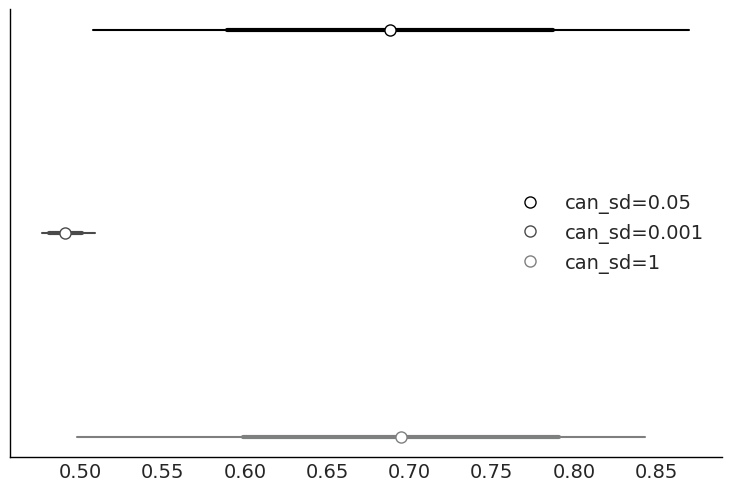

In [26]:
_, ax = plt.subplots(1)
for idx, trace in enumerate(traces):
    df = az.summary(trace, kind="stats")
    mean = df["mean"]
    sd = df["sd"]
    hdi = df.iloc[0,2:].values
    ax.plot([hdi[0], hdi[1]], [-idx, -idx],  f"C{idx}-")
    ax.plot([mean-sd, mean+sd], [-idx, -idx],  f"C{idx}-", lw=3)
    ax.plot(mean, -idx, "o", ms=8, mec=f"C{idx}", mfc="w", label=f"can_sd={sds[idx]}")
ax.set_yticks([]);
plt.legend();

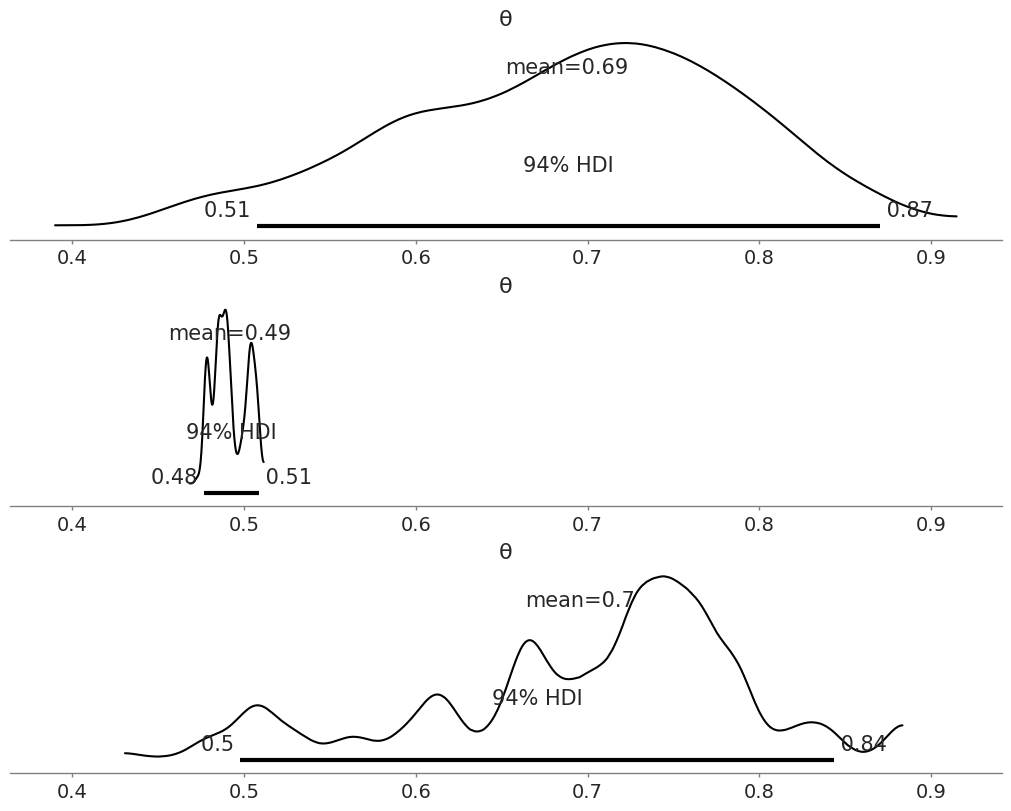

In [27]:
_, axes = plt.subplots(3, 1, figsize=(10, 8), sharex=True)
for trace, ax in zip(traces, axes.ravel()):
    az.plot_posterior(trace, ax=ax)

## 1E11
+ What is `HN`?
+ var = 200kg == stdev 14 kg == ~ 30 lbs
+ If normally distributed, then 99% within (6 x 30) = 180 lbs and 95% within (4 x 30) = 120 lbs
+

## 1E12

In [28]:
import ipywidgets as ipyw
from ipywidgets import interact, interactive, fixed, interact_manual
def posterior_grid(grid=10, a=1, b=1, heads=6, trials=9):
    grid = np.linspace(0, 1, grid)
    prior = stats.beta(a, b).pdf(grid)
    likelihood = stats.binom.pmf(heads, trials, grid)
    posterior = likelihood * prior
    posterior /= posterior.sum()
    _, ax = plt.subplots(1, 3, sharex=True, figsize=(16, 4))
    ax[0].set_title(f"heads = {heads}\ntrials = {trials}")
    for i, (e, e_n) in enumerate(zip(
            [prior, likelihood, posterior],
            ["prior", "likelihood", "posterior"])):
        ax[i].set_yticks([])
        ax[i].plot(grid, e, "o-", label=e_n)
        ax[i].legend(fontsize=14)


interact(posterior_grid,
    grid=ipyw.IntSlider(min=2, max=100, step=1, value=15),
    a=ipyw.FloatSlider(min=1, max=7, step=1, value=1),
    b=ipyw.FloatSlider(min=1, max=7, step=1, value=1),
    heads=ipyw.IntSlider(min=0, max=20, step=1, value=6),
    trials=ipyw.IntSlider(min=0, max=20, step=1, value=9))

interactive(children=(IntSlider(value=15, description='grid', min=2), FloatSlider(value=1.0, description='a', …

<function __main__.posterior_grid(grid=10, a=1, b=1, heads=6, trials=9)>

## 1E13

1. How do we think is the distribution of parameters values before seeing any data?
    + We don't know the distribution of true parameter values, but we define the uncertainty by setting a prior distribution 
2. What observed values do we think we could see before seeing any data?
    + The ones generated from the joint distributions of the prior distributions
3. After estimating parameters using a model what do we predict we will observe next?
    + Data as inferred/sampled from the joint posterior, after conditioning on the observed data 
4. What parameter values explain the observed data after conditioning on that data?
    + posterior parameter distributions
5. Which can be used to calculate numerical summaries, such as the mean, of the parameters?
    + Posterior parameter distributions
6. Which can can be used to visualize a Highest Density Interval?
    + A bar which covers most probability density? across the bottom of the distribution


## Notes on Priors
+ Conjugate priors - Used for mathematical solution of bayesian problems. Prior and posterior are from same family, so calculations can be done on paper.
+ Objective priors - (jeffreys' priors) If 2 priors are used to solve the same problem (but the problem is stated in different ways), then they will produce an equivalent result if they use objective priors. The priors are invariant under reparametrization. Often referred to as objective priors. May not be computable in complex cases.
+ Maximum entropy priors. These are also objective priors. The idea is to maximize the Kullback-Leibler divergence () between the prior and the posterior.? The maximum entropy prior is usaually a uniform distribution - this is the most uncertain informative prior. But, we can put constraints on the maximum entropy calculation if we assert facts about the prior distribution - for example the mean is 5, or the probability of values a & b is x%. I don't get this - How do we know what constraints to apply - Why not just use the full data as a constraint?
+ Weakly informative priors - not mathematically defined. We use our knowledge of the world to adjust the priors. For example, if we deal with weights of Cihhuahuas we can make some informed assumptions about the minimum and maximum height/weight. These are also known as regularizing priors because they reduce the chance of overfitting by constraining the input parameters to a model
+ What about adjusting the priors in the pseudo cross validation methods in McElreath - WAIC, and PSIS metrics. Should investigate if these are implemented in pymc3 

## 1M14

## 1M15

+ $Y \sim N(\mu, \sigma)$ - posterior? - I think I would have called call this the generative model for the data. Incorrect - this is the likelihood
+ $\mu \sim N(0, 1)$ - prior
+ $\sigma \sim HN(1)$ - prior

## 1M16
+ Posterior has 4 parameters:
    + prior for mu
    + prior for sigma
    + posterior for mu
    + posterior for sigma
+ Seems like the word posterior is used to mean the posterior parameter distributions and the posterior data distribution. Is this right?
+ Incorrect - apparently this has only 2 parameters - I don't get this

## 1M17


## 1M21

In [29]:
with pm.Model() as model:
        
    # Prior distributions
    n = theta = 0.2
    Y = pm.0
    Y ~ Bin(
    
    
    
    # ALTERNATIVE PRIORS NEXT 3 LINES
    # alpha = 1.0/df_rawdata['obs_count'].mean() # The mean count per day across the full dataset
    # lambda_1 = pm.Exponential("lambda_1", alpha)
    # lambda_2 = pm.Exponential("lambda_2", alpha)

    # Eyeballing the data, a typical day produces maybe 15 text messages, with lowest about 5, and highest say at 40
    # So, maybe can swap out exponential prior for normal mean =15, sd = (25 - 5)/6 = 20/6 ~ 3.5
    # But this is not trying to capture the distribution of the data,
    # it is trying to capture the distribution of the lambda parameters so make sd = 2
    # This works, but if sigma goes too high eg at 5.5, pymc chokes - probably because negative values in prior don't make sense
    # Complains with "ValueError: Domain error in arguments."
    # Obviously, this may choke again if the seed is changed so we get lambdas closer to 0
    # ALTERNATIVE PRIORS NEXT 4 LINES 
    mu = 15
    sigma = 2.0
    lambda_1 = pm.Normal("lambda_1", mu, sigma)
    lambda_2 = pm.Normal("lambda_2", mu, sigma)

    # Constrain prior on tau to be the change window
    tau = pm.DiscreteUniform("tau", lower=stable_period, upper=stable_period + change_window)
    
    # Function?
    idx = np.arange(total_days) # Index
    # From docs - if cond then ift else iff - ?? What does this mean? If cond true, then do first else do second?
    # docs seem a bit scant for a novice to interpret
    # Don't get this - if this was right then surely cond would be tau < idx 
    # The only way I can read this is as - If tau > switch index then lambda 2 else lambda 1
    lambda_ = pm.math.switch(tau > idx, lambda_1, lambda_2)
    
    # pm.Poisson - This is the only place I see poisson
    # Is this saying that the observed data should be modeled using a poisson distribution?
    # observation = pm.Poisson("obs", lambda_, observed=df_samples['count'].values)
    observation = pm.Poisson("obs_count", lambda_, observed=df_rawdata['obs_count'].values)

SyntaxError: invalid syntax (2437303656.py, line 5)

In [ ]:
import pymc3 as pm
with pm.Model() as model:
    # n = pm.Pois(4.5)
    n =  pm.Poisson('n', 4.5)

In [ ]:
n

In [ ]:
dir(n)

In [ ]:
print(dir(n.mean()))

In [ ]:
n.mean().size

In [ ]:
type(n.mean())